In [161]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

## Performance: N = 80, accuracy = 0.900, Spearman's correlation = 0.826

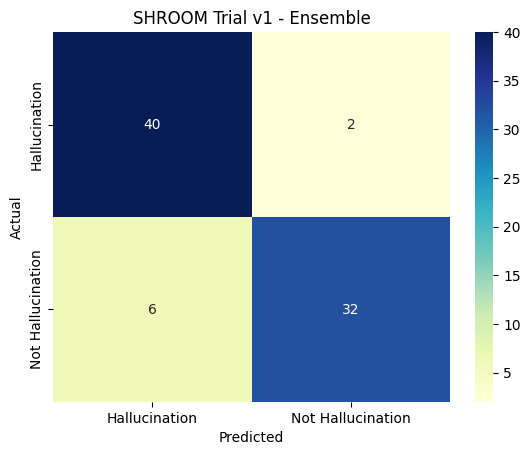

In [162]:
datapoints = json.load(open('results_trial-v1_ensemble_version_5.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])
#df_corr = results[["p(Hallucination)", "predicted_p"]].corr(method='pearson',numeric_only=True)
df_corr = results[["p(Hallucination)", "predicted_p"]].corr(method='spearman',numeric_only=True)

display(Markdown(f'## Performance: N = {cm.POP["Hallucination"]}, accuracy = {cm.ACC["Hallucination"]:.3f}, Spearman\'s correlation = {df_corr.iloc[0,1]:.3f}'))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title("SHROOM Trial v1 - Ensemble")
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [163]:
def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))].copy()
    fns["src"] = fns["src"].str.replace('<','&lt;')
    fns["src"] = fns["src"].str.replace('>','&gt;')
    fns = fns.drop("model", axis=1)
    fns = fns.drop("label", axis=1)
    fns = fns.drop("labels", axis=1)
    fns = fns.drop("predicted", axis=1)
    fns = fns.drop("predictions", axis=1)
    fns = fns.drop("timestamp", axis=1)
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))].copy()
    fps["src"] = fps["src"].str.replace('<','&lt;')
    fps["src"] = fps["src"].str.replace('>','&gt;')
    fps = fps.drop("model", axis=1)
    fps = fps.drop("label", axis=1)
    fps = fps.drop("labels", axis=1)
    fps = fps.drop("predicted", axis=1)
    fps = fps.drop("predictions", axis=1)
    fps = fps.drop("timestamp", axis=1)
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)

## False negatives

hyp,ref,src,tgt,task,p(Hallucination),predicted_p,translator_r,editor_r,writer_r,grammarian_r,lawyer_r
That is a safer way to travel.,either,A lot safer that way.,Because it’s safer.,PG,1.000000,0.000000,"The output is not a hallucination. As a translator, it's crucial to ensure that the essence and meaning of the original text is maintained in the translated or paraphrased version. In this case, the output ""That is a safer way to travel."" effectively communicates the same idea as the input ""A lot safer that way."" However, it is important to note that the context of 'travel' is added in the output which might not be present in the input, depending on the wider context. Though the added context doesn't make it a hallucination, it may not be a perfectly accurate paraphrase if the original context didn't refer to travel.",The output is not a hallucination. It accurately captures the essence of the input and target phrases by suggesting that a certain unspecified method or approach is safer. It adheres to the meaning of the original sentence and does not include any extraneous or incorrect information.,"The output is not a hallucination. While it does add a touch of specificity by stating ""way to travel"", the context or subject of safety is not drastically altered or misleading. It's a reasonable inference from the input. As a creative writer, I find this output engaging because it adds a bit of intrigue by implying a journey or travel.","The output is not a hallucination. As a grammarian, I can confirm that the generated output is grammatically correct and accurately conveys the same message as the input. The phrase ""That is a safer way to travel"" is a proper paraphrase of ""A lot safer that way"", as both sentences imply a method or approach that is deemed safer than alternatives. The output does not introduce any new or extraneous information that cannot be inferred from the input, thus it is not a hallucination.","As a lawyer, I can confirm that the output is not a hallucination. It accurately conveys the intended meaning of the input sentence by suggesting that the unspecified action or method is safer. The output does not add or imply any additional or extraneous information that is not present in the input. Therefore, it accurately paraphrases the input sentence."
I have nothing to do with it.,either,J'en ai rien à secouer.,I don't give a shit about it.,MT,0.666667,0.400000,"The output is a hallucination. While the output is not entirely incorrect, it fails to capture the full nuance and intensity of the input. The French phrase ""J'en ai rien à secouer"" is a colloquial and somewhat crude way of saying ""I don't care at all"" or ""I don't give a damn"". The English translation ""I have nothing to do with it"" doesn't fully convey this same sense of dismissiveness or indifference, making it a less accurate translation.","The output is not a hallucination, but it is not a completely accurate translation. The French phrase ""J'en ai rien à secouer"" is a colloquial expression which literally translates to ""I have nothing to shake"", but its idiomatic meaning is closer to ""I don't care"" or ""I don't give a damn"". While ""I have nothing to do with it"" could be seen as a way to express indifference, it does not convey the same level of dismissiveness and indifference as the original French phrase and the target translation ""I don't give a shit about it"". Therefore, the output is not fully accurate in capturing the tone and intensity of the original input.","While the output provided is a valid translation, it is not an accurate one in terms of capturing the intensity and informality of the original French phrase. ""J'en ai rien à secouer"" is a very casual and somewhat vulgar way to say ""I don't care"" in French, which is more accurately translated to ""I don't give a shit about it"" in English. Therefore, the output can be considered a hallucination as it fails to convey the same tone and level of dismissiveness

## False positives

hyp,ref,src,tgt,task,p(Hallucination),predicted_p,translator_r,editor_r,writer_r,grammarian_r,lawyer_r
(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of the halyard so that the <define> pigstick </define> remains vertical as it goes up and does n't foul the spreaders .",(nautical) A staff that carries a flag or pennant above the mast of a sailboat.,DM,0.333333,0.800000,"The output is a hallucination. The term to be defined is 'pigstick', but the output defines 'halyard' instead. The correct definition, as given in the target, is that a pigstick is a staff that carries a flag or pennant above the mast of a sailboat. The output does not match this definition.","The output is a hallucination. The term 'pigstick' is incorrectly defined as a 'halyard' in the output. According to the target, a 'pigstick' is a staff that carries a flag or pennant above the mast of a sailboat, not a halyard. Thus, the output is incorrect.","The output is a hallucination. The term that needed defining was 'pigstick', and the output provided a definition for 'halyard', which is a different nautical term altogether. The output fails to engage the reader with the correct information, which is a critical aspect of creative writing.","As a grammarian, I can verify that the output is grammatically correct. However, the accuracy of the definition is not within my realm of expertise. Therefore, I would recommend consulting a nautical expert to verify the accuracy of the definition.","As a lawyer, my expertise does not extend to nautical terminology. However, based on the information given, it appears that the output is a hallucination. The term 'pigstick' is defined in the target as a staff that carries a flag or pennant above the mast of a sailboat. This definition is not aligned with the output, which defines it as a halyard. The output is not consistent with the target definition provided, hence it's incorrect."
"(Australia, New Zealand, colloquial) A hatfish.",tgt,"Noah did n't realize when he stayed on the job - he was then about 600 years old and built the ark and drove the animals in two by two , the <define> hatfish </define> and the kangaroo — — he did n't realize he was laying the foundation for an occupation for old men in New York , several years later .",(colloquial) Synonym of halibut,DM,0.333333,1.000000,"The output is a hallucination. As a translator, my primary concern is the accuracy and correctness of the provided translation. In this case, the output incorrectly defines ""hatfish"" with reference to Australia and New Zealand, which is not mentioned or implied in the input. The correct definition according to the target is ""Synonym of halibut"". The output provided does not align with this definition, hence it can be classified as a hallucination.","The output is a hallucination. The output inaccurately defines ""hatfish"" as an Australian and New Zealand colloquial term, without providing any specific meaning. This contradicts the target, which indicates that ""hatfish"" is a synonym for halibut. The output does not provide a correct or useful definition, and it adds extraneous geographic information not suggested by the input.","The output is a hallucination. As a creative writer, I am concerned with the accuracy and relevance of the content. The output definition provided for the term 'hatfish' is incorrect and off point. It is specified as a colloquial term used in Australia and New Zealand. However, the target definition indicates that it's a synonym for 'halibut'. The output does not match the target and does not provide an accurate or relevant definition for the term in the context provided in the input. Thus, the output is a hallucination.","The output is a hallucination. From a grammatical perspective, the output is well-formed. However, the content is incorrect. The term 'hatfish' in the output is incorrectly defined as an Australian or New Zealand colloquial term. The target indicates that 'hatfish' is a syno